In [40]:
#importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report

In [5]:
#loading data
data=pd.read_csv("goldprice.csv")
data.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [23]:
#counting the null values
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [24]:
#statistics of data
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [13]:
#finding correlation
correlation=data.corr()

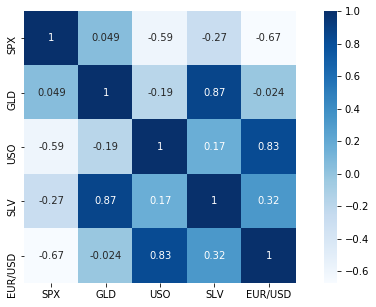

In [19]:
#visualizing correlation
plt.figure(figsize=(10,5))
sns.heatmap(correlation,cbar=True,square=True,annot=True,cmap="Blues")

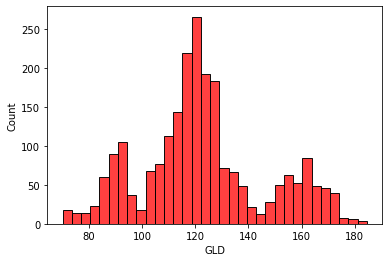

In [22]:
#distribution of gold
sns.histplot(data.GLD,color="red")

In [28]:
X=data.drop(['Date','GLD'],axis=1)#feature variable
Y=data.GLD#target varible

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
#splitting the datasets

In [32]:
reg= RandomForestRegressor(n_estimators=100)
#creating model instance

In [33]:
reg.fit(X_train,Y_train)
#fitting the model

RandomForestRegressor()

In [34]:
Y_predict=reg.predict(X_test)
#predicting the target variable

In [46]:
#accuracy
reg.score(X_test,Y_test)
Y_test=list(Y_test)

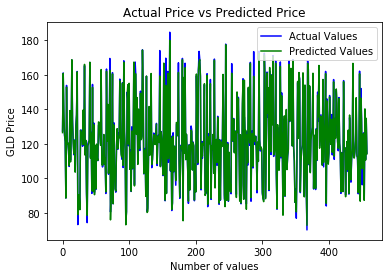

In [48]:
#visualizing the actual and predicted values
plt.plot(Y_test, color='blue', label = 'Actual Values')
plt.plot(Y_predict, color='green', label='Predicted Values')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()